<a href="https://colab.research.google.com/github/RupeshSharma14/Airbnb-Bookings-Analysis/blob/main/Individual_Notebook_Airbnb_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction** 

### <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

### <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

### <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **Installing Dependencies**

In [1]:
!pip install matplotlib --upgrade     # updating matplotlib as we are using bar_label function which is introduced in recent versions(matplotlib >= 3.4.2) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Note - After installing the dependencies, we will have to restart the runtime.**

# **Data Preparation and Cleaning** 

In [3]:
# Importing Libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [4]:
# Configuration for matplotlib graphs

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (13, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid');

In [5]:
# Mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Loading the csv file into pandas dataframe

path = "/content/drive/MyDrive/Airbnb Bookings Analysis/Airbnb NYC 2019.csv"
airbnb_df = pd.read_csv(path)

In [7]:
# Displaying the dataframe

airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
# Checking the size of dataset

airbnb_df.shape

(48895, 16)

**The dataset contains 48895 observations and 16 features.**

In [9]:
# Checking for duplicate rows in the dataset

airbnb_df.duplicated().sum()

0

In [10]:
# Checking the basic information of the dataset

airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**The dataset contains a mix of numerical and categorical features.**

**The dataset contain NULL values in "id","name","last_review" and "reviews_per_month" columns.**

In [11]:
# Counting the number of null values in "name", "host_name", "number_of_reviews" and "last_review" columns

nan_values_cols = ["name", "host_name", "reviews_per_month", "last_review"]
airbnb_df[nan_values_cols].isna().sum()

name                    16
host_name               21
reviews_per_month    10052
last_review          10052
dtype: int64

In [12]:
# Handling the NULL values in "name", "host_name" and "reviews_per_month" columns

airbnb_df.dropna(subset = ["name", "host_name"], inplace = True)        # Dropping the rows having NULL values in "name", "host_name" column

airbnb_df["reviews_per_month"].fillna(0.0, inplace = True)              # Filling NULL values of "reviews_per_month" with 0.0

In [13]:
# Converting the data type of "last_review" column to datetime object

airbnb_df["last_review"] = airbnb_df["last_review"].astype("datetime64")

In [14]:
# Extracting year and month from the "last_review" column

airbnb_df["last_review_month"] = airbnb_df["last_review"].apply(lambda row: row.month)
airbnb_df["last_review_year"] = airbnb_df["last_review"].apply(lambda row: row.year)

In [15]:
# Dropping "last_review", "reviews_per_month" column

airbnb_df.drop(labels = ["last_review", "reviews_per_month"], axis = 1, inplace = True)        

In [16]:
# Descriptive summary

col_to_check = ['price',	'minimum_nights','number_of_reviews', 'calculated_host_listings_count','availability_365', 'last_review_month',	'last_review_year']
airbnb_df[col_to_check].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,last_review_month,last_review_year
count,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,38821.000000,38821.000000
mean,152.740309,7.012444,23.273098,7.148369,112.801425,6.173901,2018.288323
std,240.232386,20.019757,44.549898,32.964600,131.610962,2.531374,1.180598
min,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2011.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000,5.000000,2018.000000
50%,106.000000,3.000000,5.000000,1.000000,45.000000,6.000000,2019.000000
75%,175.000000,5.000000,24.000000,2.000000,227.000000,7.000000,2019.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000,12.000000,2019.000000


**The minimum price of a listing is mentioned 0 here but Airbnb starts the listing price with a minimum of $10.**

**Minimum availability of a listing is 0 it may be due to following possibilities:**

> **1. May be the listing is booked for a year by the guest.**

> **2. There might be a chance of bad entry.**

**Although Airbnb was founded in 2008 but our dataset contains data from 2011 to 2019.**

**The descriptive summary also tells us outliers are present in many columns of the data.**

In [17]:
# Changing the minimum price to $10

airbnb_df["price"] = np.where(airbnb_df["price"] < 10, 10, airbnb_df["price"])

In [18]:
# Creating a new column "price_category"

airbnb_df["price_category"] = pd.cut(airbnb_df["price"], bins = [10, 100, 200, 10000], include_lowest = True, labels = ["low", "mid", "high"])

In [19]:
# Displaying the final dataframe after data preparation

airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,last_review_month,last_review_year,price_category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,10.0,2018.0,mid
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,5.0,2019.0,high
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,NaN,NaN,mid
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,7.0,2019.0,low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,11.0,2018.0,low


# <b>Data Exploration and Visualization</b>

In [20]:
# Number of listings present in the dataset

num_listings = airbnb_df["id"].count()
num_listings

48858

> **There are 48,858 listings present in the dataset.**



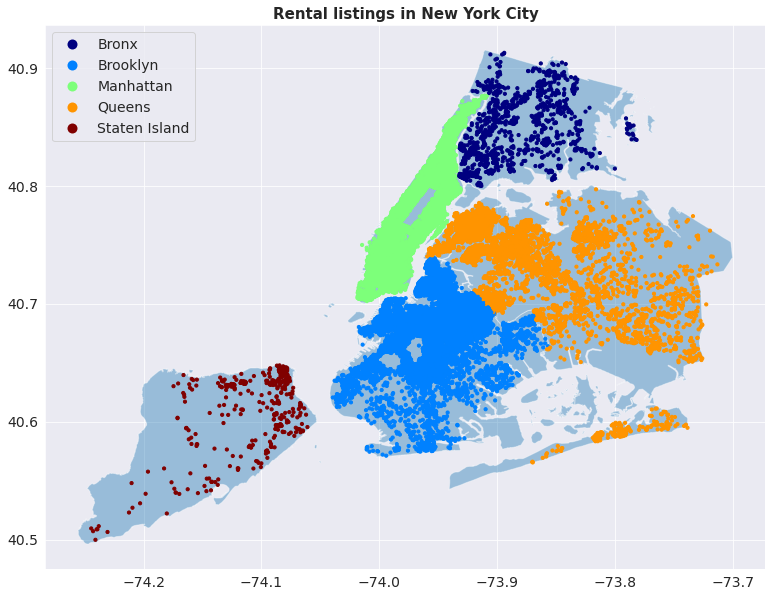

In [21]:
# Visualisation of listing on NYC map

gdp_path ="/content/drive/MyDrive/Airbnb Bookings Analysis/Borough Boundaries/geo_export_0c550535-4d21-4555-aa94-73550209bb00.shp"

# loading the New York city map
street_map = gpd.read_file(gdp_path)

# Zip x and y coordinates
geometry = [Point(xy) for xy in zip(airbnb_df["longitude"], airbnb_df["latitude"])]

# Creating Geopandas dataframe
geo_df = gpd.GeoDataFrame(airbnb_df, geometry = geometry)

# Creating figure and axes, assign to subplot
fig, ax = plt.subplots(figsize = (15, 10))

# Add .shp mapfile to axes
street_map.plot(ax = ax, alpha = 0.4)
geo_df.plot(column = "neighbourhood_group", ax = ax, legend = True, markersize = 10, cmap = "jet")

# Adding title to graph
plt.title("Rental listings in New York City", fontsize = 15, fontweight = "bold")

plt.show()



> **From the map, we can see that there are listings from most parts of Manhattan followed by Brooklyn.**


> **Staten Island has the least number of listings.**




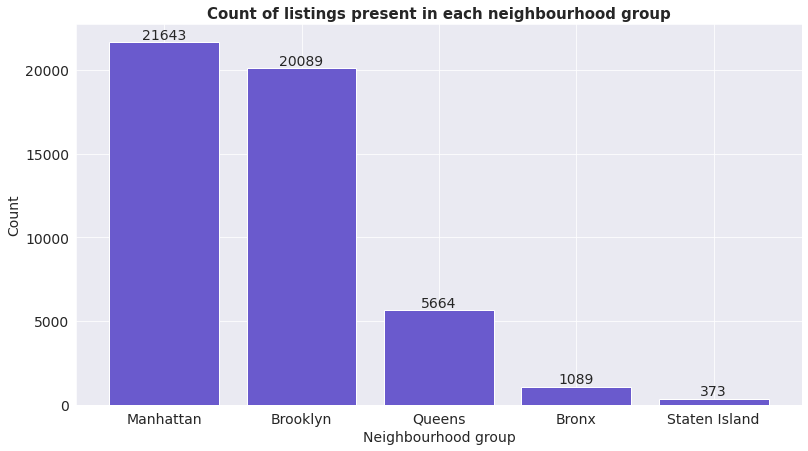

In [22]:
# Number of listings present in each neighbourhood_group

nbhd_grp_count = airbnb_df["neighbourhood_group"].value_counts()
nbhd_grp_count_plot = plt.bar(x = nbhd_grp_count.index, height = nbhd_grp_count.values, color = "slateblue")
plt.bar_label(nbhd_grp_count_plot)

plt.xlabel("Neighbourhood group")
plt.ylabel("Count")
plt.title("Count of listings present in each neighbourhood group", fontsize = 15, fontweight = "bold")

plt.show()



---



> **Airbnb has a widespread business across Manhattan and Brooklyn as the most number of listings in the New York City area are from here.**



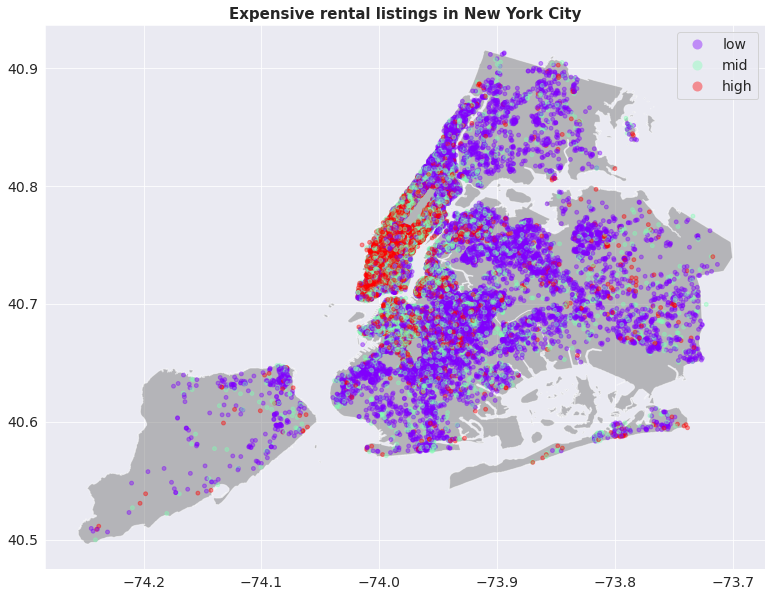

In [23]:
# Expensive rental listings in New York City map

fig, ax = plt.subplots(figsize = (15, 10))
street_map.plot(ax = ax, alpha = 0.5, color = "grey")
geo_df.plot(column = "price_category", alpha = 0.4, ax = ax, legend = True, markersize = 15, cmap = "rainbow")

plt.title("Expensive rental listings in New York City", fontsize = 15, fontweight = "bold")

plt.show()

> **Its clearly visible, Manhattan has the expensive listings. It means that Manhattan is the most profitable location both for the Airbnb and its hosts.**



In [24]:
# Median price of listings in each neighbourhood_group

airbnb_df.groupby("neighbourhood_group")["price"].median().to_frame()

,price
neighbourhood_group,
Bronx,65.0
Brooklyn,90.0
Manhattan,150.0
Queens,75.0
Staten Island,75.0




> **The median price of a listing in Manhattan is $150 and there is a huge gap in the median price of Manhattan as compared to other neighbourhood groups.**



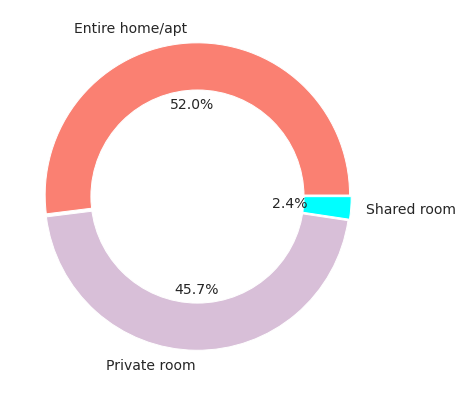

In [25]:
# Type of room space airbnb host provides
 
plt.pie(airbnb_df['room_type'].value_counts(), labels = ['Entire home/apt', 'Private room', 'Shared room'], autopct='%1.1f%%',
        explode = [0.01, 0.01, 0.01], colors = ["salmon", "thistle", "aqua"])

# Adding a circle at the center to transform it in a donut chart
circle = plt.Circle( (0,0), 0.7, color='white')
ax = plt.gcf()
ax.gca().add_artist(circle)

plt.show()

> **Most of the Airbnb hosts present in New York City rent there Entire home/apartment and Private room.**

> **Shared rooms are rarely rented by hosts.**







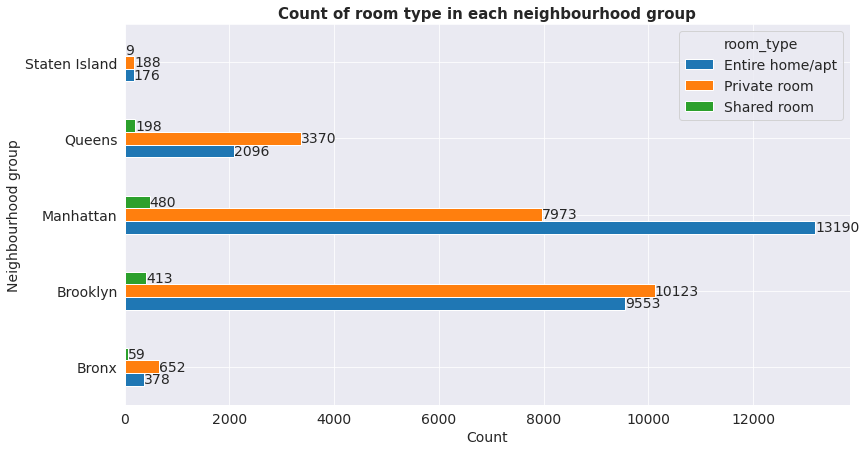

In [26]:
# Type of room space airbnb host provides in each neighbourhood group

nhbd_grp_rm =  pd.crosstab(index = airbnb_df["neighbourhood_group"], columns = airbnb_df["room_type"])
nhbd_grp_rm_plot = nhbd_grp_rm.plot(kind = "barh")

for container in nhbd_grp_rm_plot.containers:
  nhbd_grp_rm_plot.bar_label(container)

plt.xlabel("Count")
plt.ylabel("Neighbourhood group")
plt.title("Count of room type in each neighbourhood group", fontsize = 15, fontweight = "bold")

plt.show()

> **It seems like half the listings renting out Entire houses and apartments are from Manhattan only.**


> **Private rooms are mostly preferred in other neighbourhood group.**

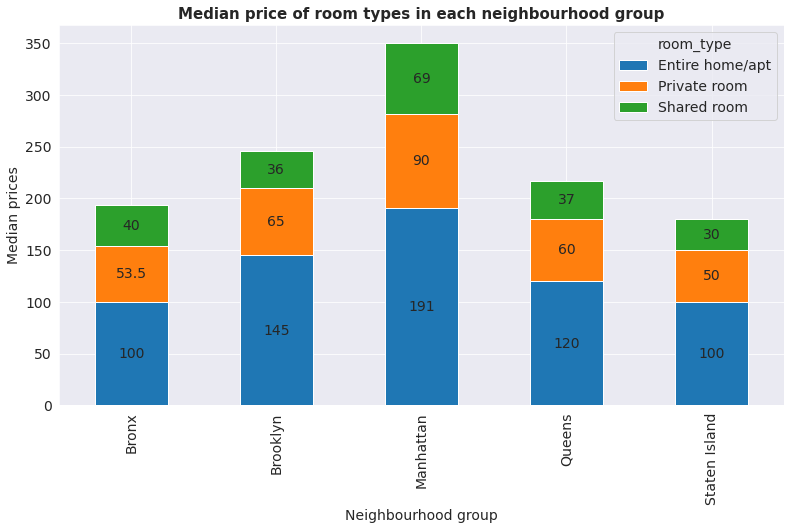

In [27]:
# Median price of room in every neighbourhood group for each room type

nhbd_grp_rm_price = pd.pivot_table(data = airbnb_df, values = "price",index = "neighbourhood_group", columns = "room_type", aggfunc = np.median)
nhbd_grp_rm_plot = nhbd_grp_rm_price.plot(kind = "bar", stacked = True)

for container in nhbd_grp_rm_plot.containers:
  nhbd_grp_rm_plot.bar_label(container, label_type = "center")

plt.xlabel("Neighbourhood group")
plt.ylabel("Median prices")
plt.title("Median price of room types in each neighbourhood group", fontsize = 15, fontweight = "bold")

plt.show()

> **Entire houses and apartments are expensive in every neighbourhood group.**

> **Brooklyn and Queens have similar price ranges for Private and Shared rooms.**

> **The Bronx and Staten Island have a similar type of price range for each room type.**





In [28]:
# Minimum night stay for each room type

airbnb_df.groupby('room_type')['minimum_nights'].median().reset_index()

,room_type,minimum_nights
0,Entire home/apt,3.0
1,Private room,2.0
2,Shared room,1.0




> **Minimum three nights of stay is required for Entire house, two nights of stay for Private rooms and one night of stay for Shared room.**



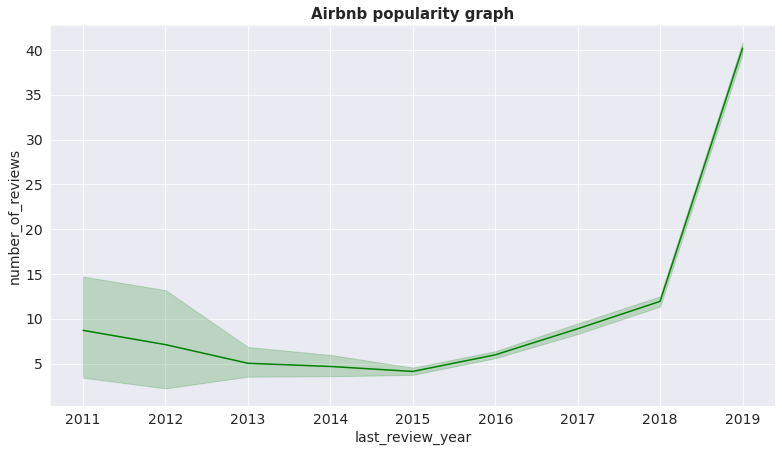

In [29]:
# Airbnb popularity graph

year_df = airbnb_df[~airbnb_df["last_review_year"].isna()]

sns.lineplot(x = "last_review_year", y = "number_of_reviews",   data = year_df, color = "green")
plt.title("Airbnb popularity graph", fontsize = 15, fontweight = "bold")

plt.show()

> **It seems that from 2011 there was a decline in the popularity of Airbnb till 2015.**

> **From 2015 there is a sudden rise in the popularity of Airbnb in New York City. The rise may be due to new schemes introduced and change in marketing strategy.**



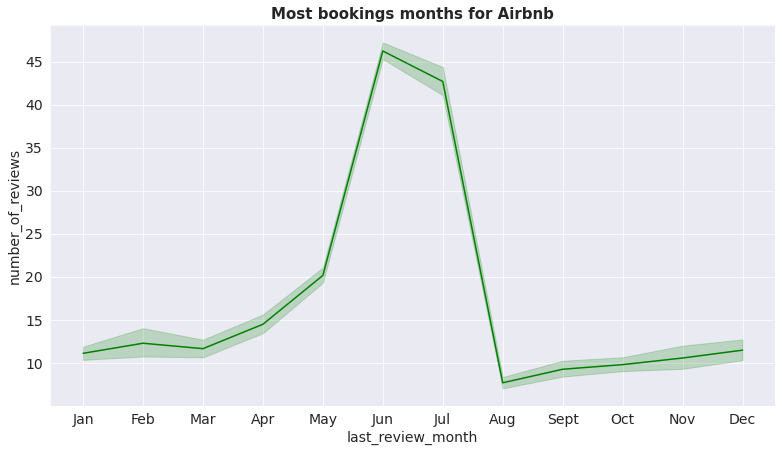

In [30]:
# Most bookings months for Airbnb

month_labels = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
                9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

month_df = airbnb_df[~airbnb_df["last_review_month"].isna()].sort_values(by = "last_review_month", ascending = True)
month_df['last_review_month'] = month_df['last_review_month'].apply(lambda x: month_labels[x])

sns.lineplot(x = "last_review_month", y = "number_of_reviews",  data = month_df, color = "green")
plt.title("Most bookings months for Airbnb", fontsize = 15, fontweight = "bold")

plt.show()

> **In New York City, Airbnb has its most bookings for the month of June.**


> **The peak business months for Airbnb are May, June and July.**





# **Inferences**

* **Manhattan and Brooklyn are the most crowded boroughs of New York City as compared to Staten Island, Queens and Bronx so increasing the number of hosts  in Manhattan and Brooklyn will help in generating more revenue.**

* **Manhattan’s listings are most expensive so offering special discounts in the peak season might help in attracting more customers.**

* **Optimising the price of listings in other boroughs using our analysis also helps in increasing the business.**

* **Customers prefer to stay in Entire home/apt or private room types as compared to shared room types so Airbnb should strategize on making more entire and private rooms available.**

* **Most bookings are made in the months of May, June and July so to counter the demands of customers special arrangements could be made.**


